In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [15]:
df = pd.read_csv('measures_v2.csv')
new_order = ['profile_id', 'i_d', 'i_q', 'u_d', 'u_q', 'coolant', 'ambient', 'motor_speed', 'torque',
              'stator_winding',  'stator_yoke', 'stator_tooth', 'pm']
df = df.reindex(columns=new_order)
df.head(10)

,profile_id,i_d,i_q,u_d,u_q,coolant,ambient,motor_speed,torque,stator_winding,stator_yoke,stator_tooth,pm
0,17,0.004419,0.000328,-0.350055,-0.450682,18.805172,19.850691,0.002866,0.187101,19.086670,18.316547,18.293219,24.554214
1,17,0.000606,-0.000785,-0.305803,-0.325737,18.818571,19.850672,0.000257,0.245417,19.092390,18.314955,18.294807,24.538078
2,17,0.001290,0.000386,-0.372503,-0.440864,18.828770,19.850657,0.002355,0.176615,19.089380,18.326307,18.294094,24.544693
3,17,0.000026,0.002046,-0.316199,-0.327026,18.835567,19.850647,0.006105,0.238303,19.083031,18.330833,18.292542,24.554018
4,17,-0.064317,0.037184,-0.332272,-0.471150,18.857033,19.850639,0.003133,0.208197,19.082525,18.326662,18.291428,24.565397
5,17,-0.613635,0.336747,0.009147,-0.538973,18.901548,19.850634,0.009636,0.476218,19.077108,18.323862,18.290628,24.573601
6,17,-1.005647,0.554211,0.238890,-0.653148,18.941711,19.850630,0.001337,0.670015,19.074583,18.321936,18.292524,24.576578
7,17,-1.288384,0.706370,0.395099,-0.758392,18.960861,19.850628,0.001422,0.752035,19.082499,18.314655,18.294041,24.574949
8,17,-1.490530,0.817339,0.546623,-0.727128,18.973545,19.850626,0.000577,0.910541,19.085533,18.306925,18.291964,24.567080
9,17,-1.634464,0.898013,0.578944,-0.874307,18.987812,19.850624,-0.001248,0.924010,19.076025,18.301733,18.287233,24.553242


In [22]:
df.isnull().sum()

profile_id        0
i_d               0
i_q               0
u_d               0
u_q               0
coolant           0
ambient           0
motor_speed       0
torque            0
stator_winding    0
stator_yoke       0
stator_tooth      0
pm                0
dtype: int64

In [23]:
df.describe()

,profile_id,i_d,i_q,u_d,u_q,coolant,ambient,motor_speed,torque,stator_winding,stator_yoke,stator_tooth,pm
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,4.079306e+01,-6.871681e+01,3.741278e+01,-2.513381e+01,5.427900e+01,3.622999e+01,2.456526e+01,2.202081e+03,3.110603e+01,6.634275e+01,4.818796e+01,5.687858e+01,5.850678e+01
std,2.504549e+01,6.493323e+01,9.218188e+01,6.309197e+01,4.417323e+01,2.178615e+01,1.929522e+00,1.859663e+03,7.713575e+01,2.867206e+01,1.999100e+01,2.295223e+01,1.900150e+01
min,2.000000e+00,-2.780036e+02,-2.934268e+02,-1.315304e+02,-2.529093e+01,1.062375e+01,8.783478e+00,-2.755491e+02,-2.464667e+02,1.858582e+01,1.807669e+01,1.813398e+01,2.085696e+01
25%,1.700000e+01,-1.154061e+02,1.095863e+00,-7.869090e+01,1.206992e+01,1.869814e+01,2.318480e+01,3.171107e+02,-1.374265e-01,4.278796e+01,3.199033e+01,3.841601e+01,4.315158e+01
50%,4.300000e+01,-5.109376e+01,1.577401e+01,-7.429755e+00,4.893818e+01,2.690014e+01,2.479733e+01,1.999977e+03,1.086035e+01,6.511013e+01,4.562551e+01,5.603635e+01,6.026629e+01
75%,6.500000e+01,-2.979688e+00,1.006121e+02,1.470271e+00,9.003439e+01,4.985749e+01,2.621702e+01,3.760639e+03,9.159718e+01,8.814114e+01,6.146083e+01,7.558668e+01,7.200837e+01
max,8.100000e+01,5.189670e-02,3.017079e+02,1.314698e+02,1.330370e+02,1.015985e+02,3.071420e+01,6.000015e+03,2.610057e+02,1.413629e+02,1.011480e+02,1.119464e+02,1.136066e+02


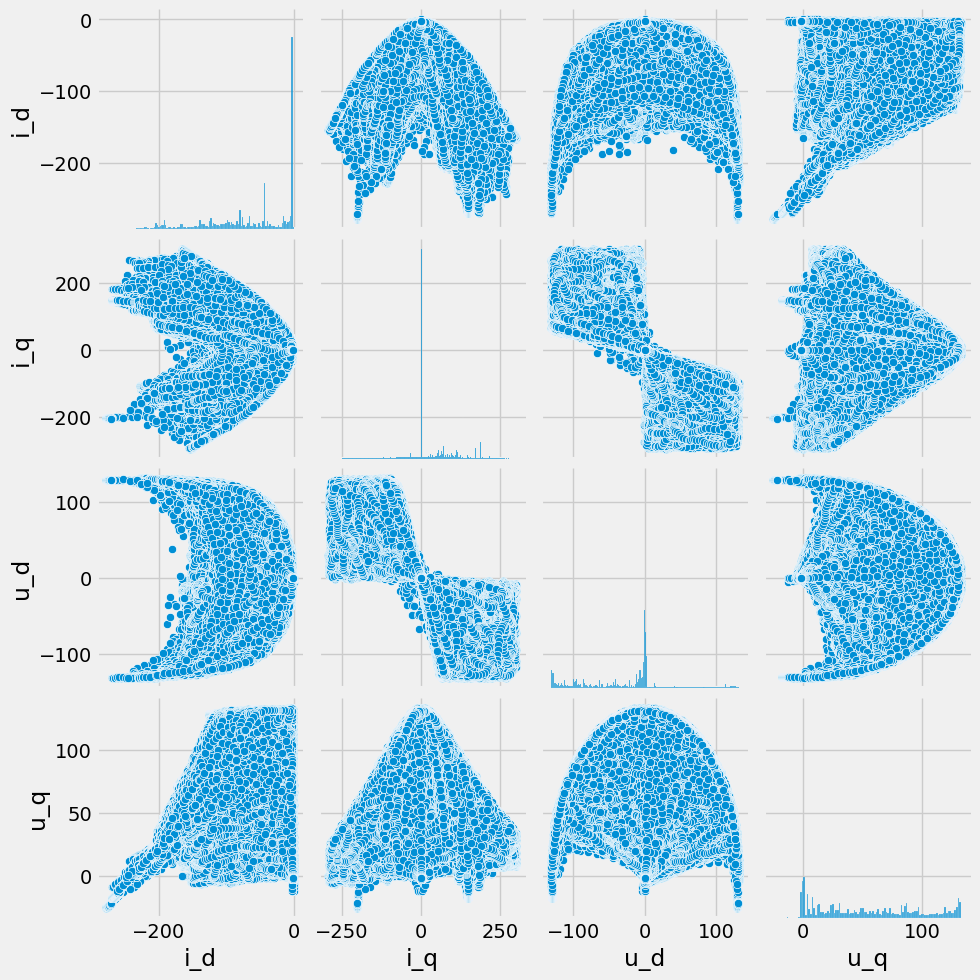

In [24]:
# Токи и напряжения 
selected = df.loc[:, ['i_d', 'i_q', 'u_d', 'u_q']]
sns.pairplot(selected) 
plt.show()

In [ ]:
# 'i_d', 'i_q', 'u_d', 'u_q', 'coolant', 'ambient', 'motor_speed', 'torque',
#              'stator_winding',  'stator_yoke', 'stator_tooth', 'pm'
# Токи и напряжения и 
selected = df.loc[:, ['i_d', 'i_q', 'u_d', 'u_q']]
sns.pairplot(selected) 
plt.show()

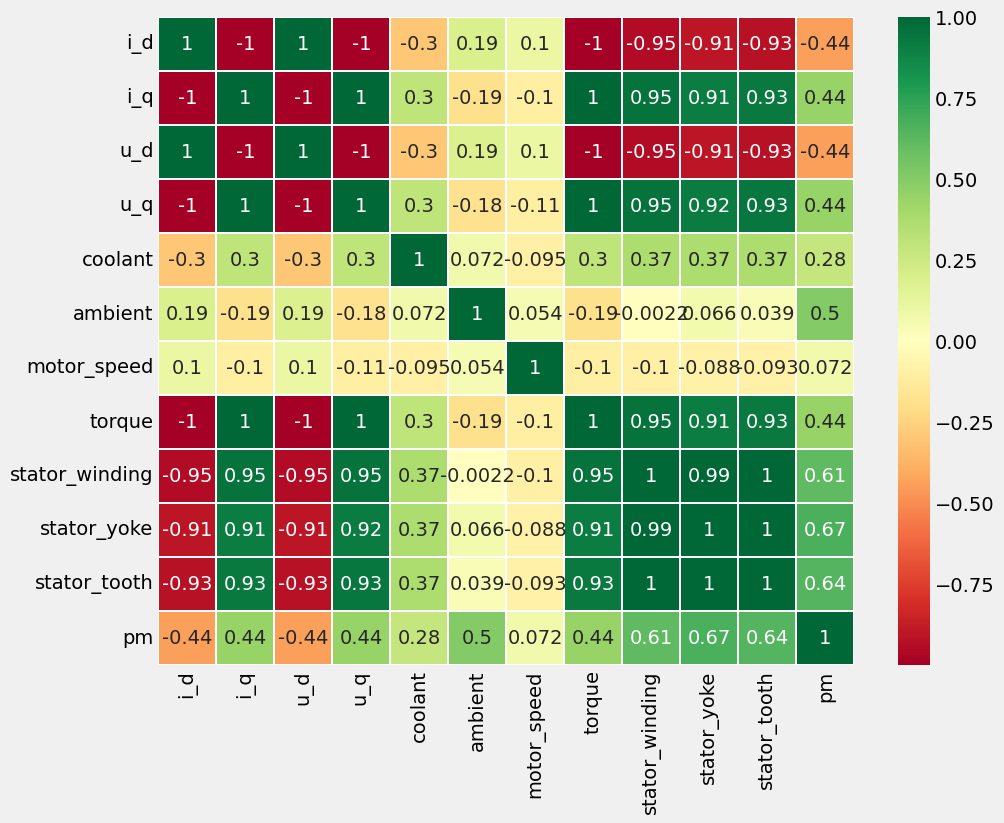

In [16]:
# Для одной серии измерений
df_this = df[df['profile_id'] == 2].loc[:, ['i_d', 'i_q', 'u_d', 'u_q', 
                                            'coolant', 'ambient', 'motor_speed', 'torque',
                                            'stator_winding',  'stator_yoke', 'stator_tooth', 'pm']]  
sns.heatmap(df_this.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

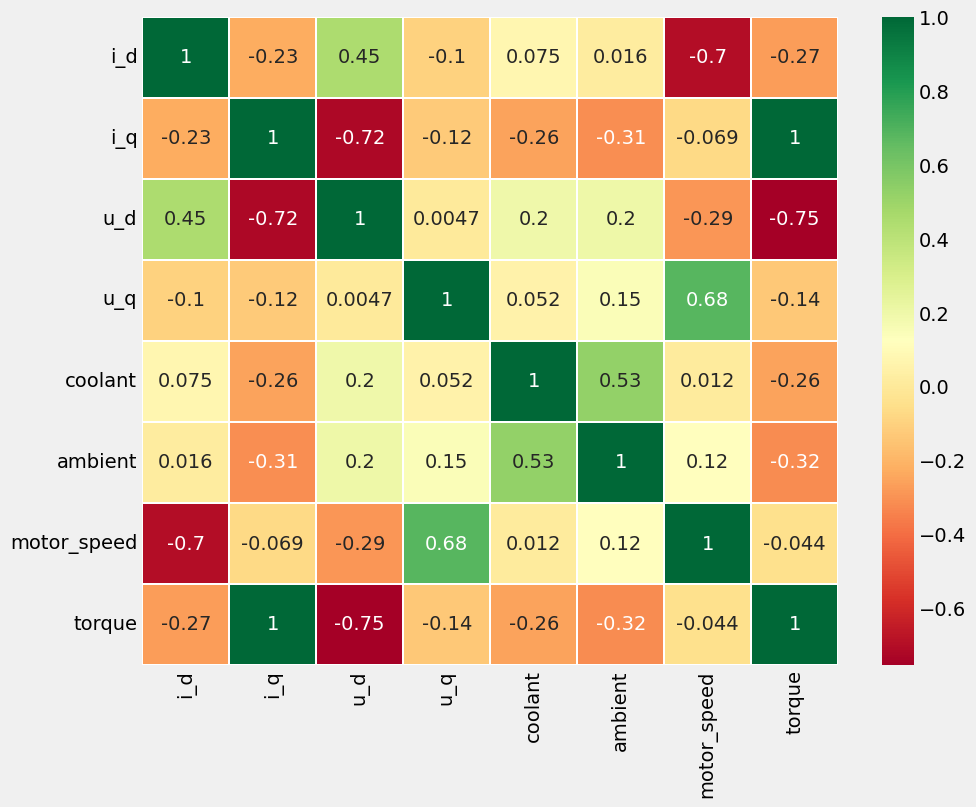

In [17]:
# для целевого параметра torque по всему датасету
df_this = df.loc[:, ['i_d', 'i_q', 'u_d', 'u_q', 'coolant', 'ambient', 'motor_speed', 'torque' ]]  
sns.heatmap(df_this.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [61]:
torque_features = ['i_d', 'i_q', 'u_d', 'u_q', 'coolant', 'ambient', 'torque']
all_features = ['i_d', 'i_q', 'u_d', 'u_q', 'coolant', 'ambient', 'motor_speed', 'torque',
              'stator_winding',  'stator_yoke', 'stator_tooth', 'pm']
df_stat = df.loc[:, all].describe()
df_stat

,i_d,i_q,u_d,u_q,coolant,ambient,motor_speed,torque,stator_winding,stator_yoke,stator_tooth,pm
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,-6.871681e+01,3.741278e+01,-2.513381e+01,5.427900e+01,3.622999e+01,2.456526e+01,2.202081e+03,3.110603e+01,6.634275e+01,4.818796e+01,5.687858e+01,5.850678e+01
std,6.493323e+01,9.218188e+01,6.309197e+01,4.417323e+01,2.178615e+01,1.929522e+00,1.859663e+03,7.713575e+01,2.867206e+01,1.999100e+01,2.295223e+01,1.900150e+01
min,-2.780036e+02,-2.934268e+02,-1.315304e+02,-2.529093e+01,1.062375e+01,8.783478e+00,-2.755491e+02,-2.464667e+02,1.858582e+01,1.807669e+01,1.813398e+01,2.085696e+01
25%,-1.154061e+02,1.095863e+00,-7.869090e+01,1.206992e+01,1.869814e+01,2.318480e+01,3.171107e+02,-1.374265e-01,4.278796e+01,3.199033e+01,3.841601e+01,4.315158e+01
50%,-5.109376e+01,1.577401e+01,-7.429755e+00,4.893818e+01,2.690014e+01,2.479733e+01,1.999977e+03,1.086035e+01,6.511013e+01,4.562551e+01,5.603635e+01,6.026629e+01
75%,-2.979688e+00,1.006121e+02,1.470271e+00,9.003439e+01,4.985749e+01,2.621702e+01,3.760639e+03,9.159718e+01,8.814114e+01,6.146083e+01,7.558668e+01,7.200837e+01
max,5.189670e-02,3.017079e+02,1.314698e+02,1.330370e+02,1.015985e+02,3.071420e+01,6.000015e+03,2.610057e+02,1.413629e+02,1.011480e+02,1.119464e+02,1.136066e+02


In [62]:
two_sigma = {}
for key in all_features:
    two_sigma[key] = abs(df_stat.loc['max', key] - df_stat.loc['mean', key])/df_stat.loc['std', key] < 2 * df_stat.loc['std', key]
df_stat.loc['two_sigma'] = pd.Series(three_sigma, dtype=bool)
df_stat

,i_d,i_q,u_d,u_q,coolant,ambient,motor_speed,torque,stator_winding,stator_yoke,stator_tooth,pm
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,-6.871681e+01,3.741278e+01,-2.513381e+01,5.427900e+01,3.622999e+01,2.456526e+01,2.202081e+03,3.110603e+01,6.634275e+01,4.818796e+01,5.687858e+01,5.850678e+01
std,6.493323e+01,9.218188e+01,6.309197e+01,4.417323e+01,2.178615e+01,1.929522e+00,1.859663e+03,7.713575e+01,2.867206e+01,1.999100e+01,2.295223e+01,1.900150e+01
min,-2.780036e+02,-2.934268e+02,-1.315304e+02,-2.529093e+01,1.062375e+01,8.783478e+00,-2.755491e+02,-2.464667e+02,1.858582e+01,1.807669e+01,1.813398e+01,2.085696e+01
25%,-1.154061e+02,1.095863e+00,-7.869090e+01,1.206992e+01,1.869814e+01,2.318480e+01,3.171107e+02,-1.374265e-01,4.278796e+01,3.199033e+01,3.841601e+01,4.315158e+01
50%,-5.109376e+01,1.577401e+01,-7.429755e+00,4.893818e+01,2.690014e+01,2.479733e+01,1.999977e+03,1.086035e+01,6.511013e+01,4.562551e+01,5.603635e+01,6.026629e+01
75%,-2.979688e+00,1.006121e+02,1.470271e+00,9.003439e+01,4.985749e+01,2.621702e+01,3.760639e+03,9.159718e+01,8.814114e+01,6.146083e+01,7.558668e+01,7.200837e+01
max,5.189670e-02,3.017079e+02,1.314698e+02,1.330370e+02,1.015985e+02,3.071420e+01,6.000015e+03,2.610057e+02,1.413629e+02,1.011480e+02,1.119464e+02,1.136066e+02
two_sigma,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


считаем что с выбросами все ок.

In [63]:
# Токи и напряжения 
selected = df.loc[:, torque_features]
sns.pairplot(selected) 
plt.show()


KeyboardInterrupt: 

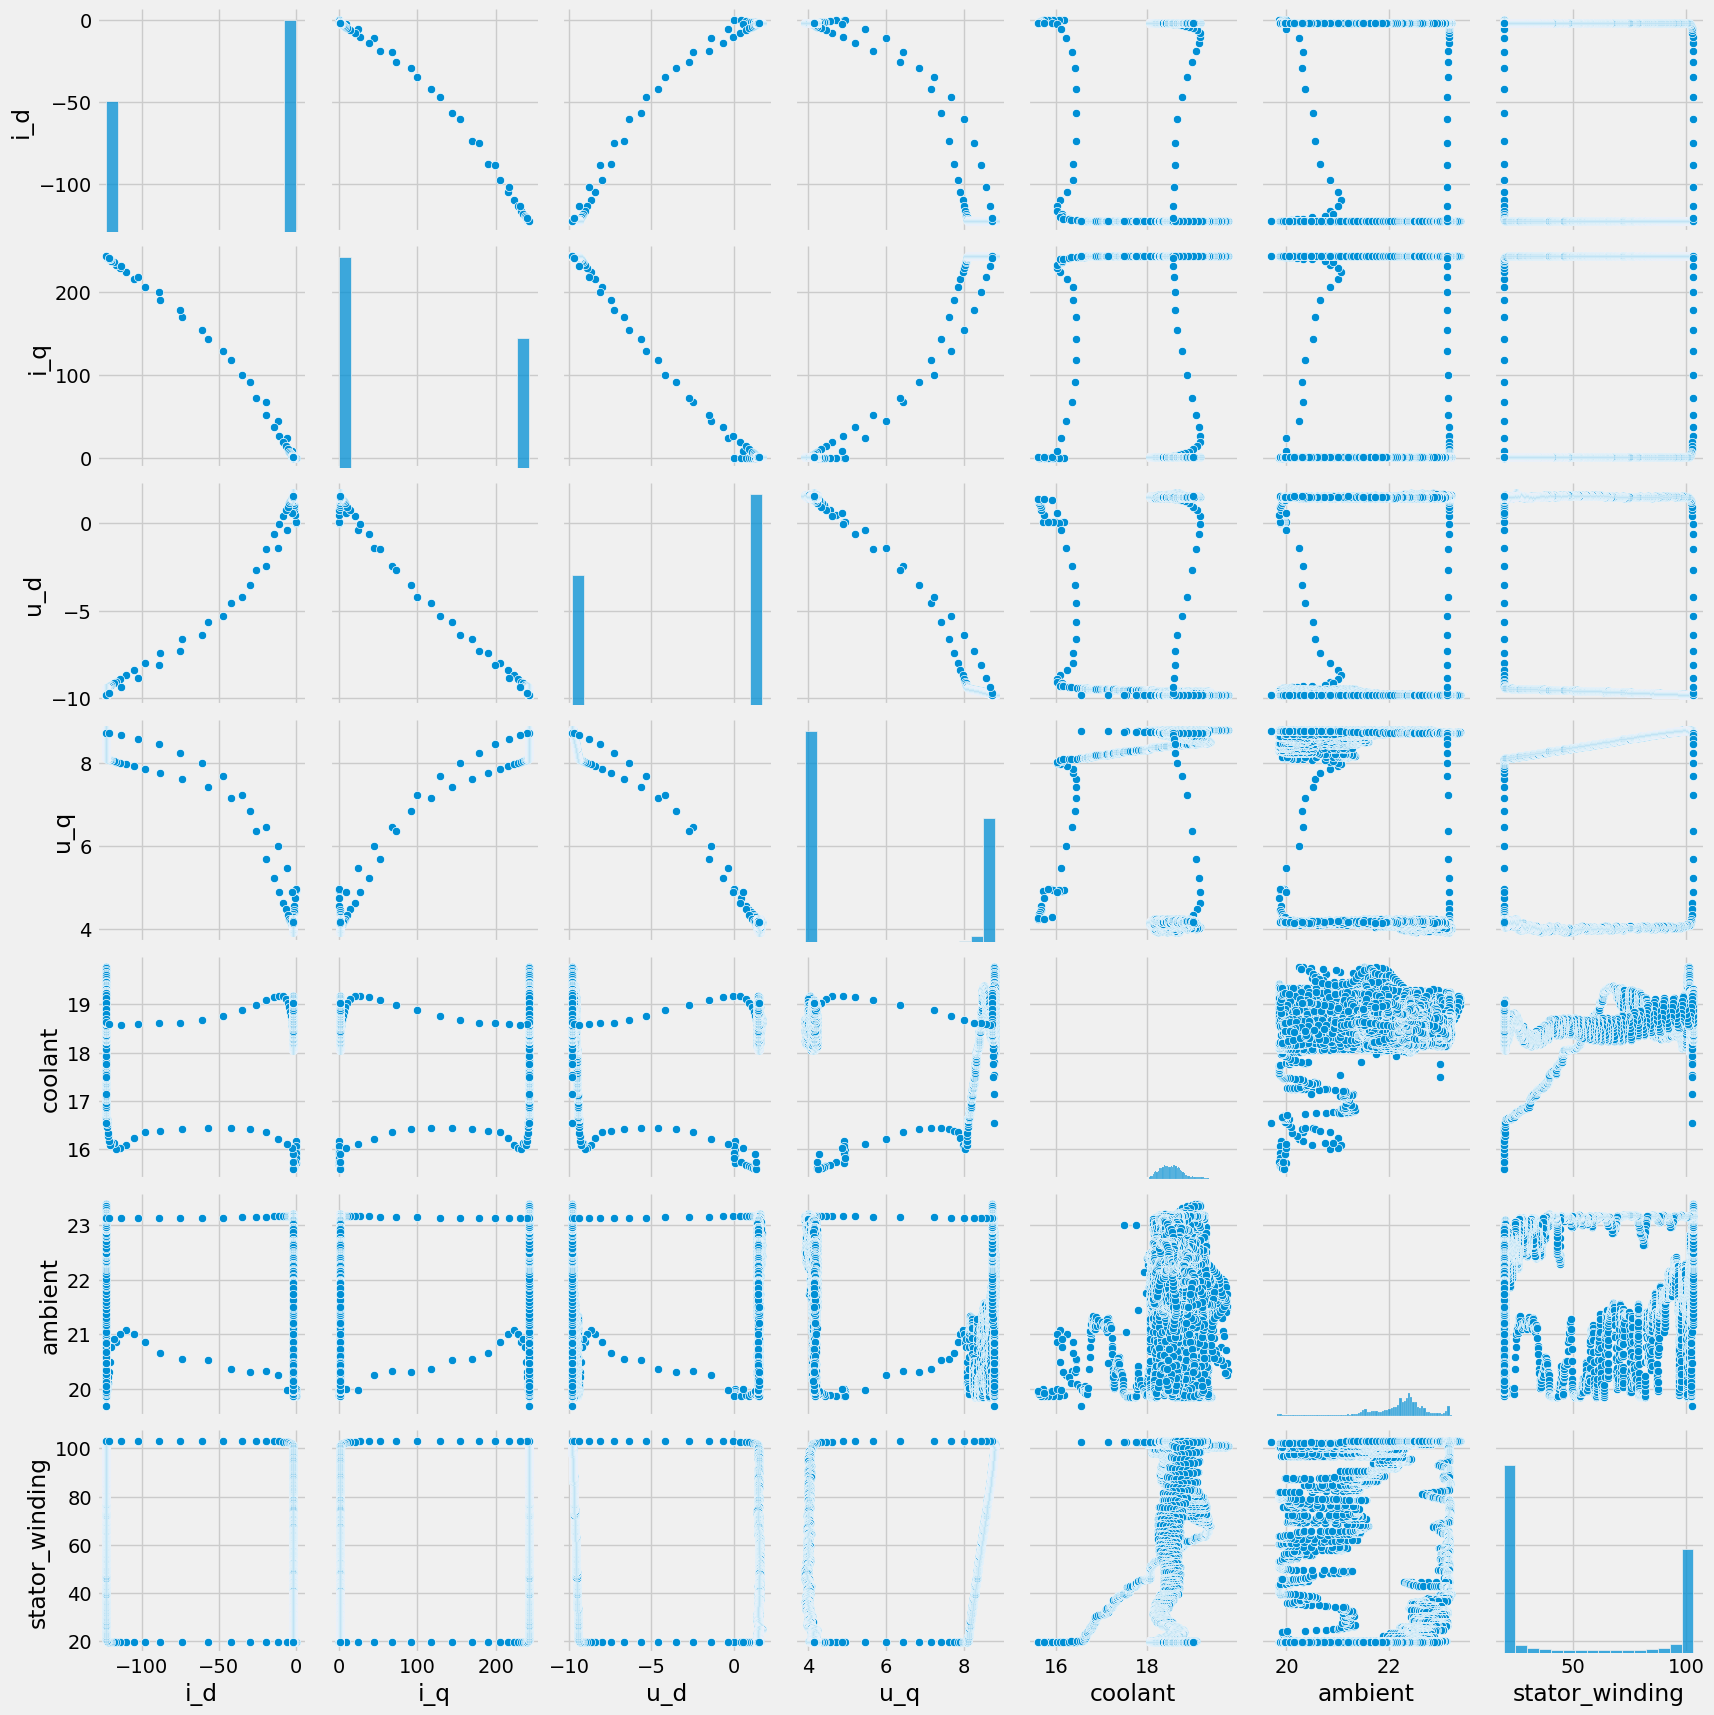

In [10]:
selected = df[df['profile_id'] == 2].loc[:, ['i_d', 'i_q', 'u_d', 'u_q', 'coolant', 'ambient', 'stator_winding']]
sns.pairplot(selected) 
# displaying the plot 
plt.show()

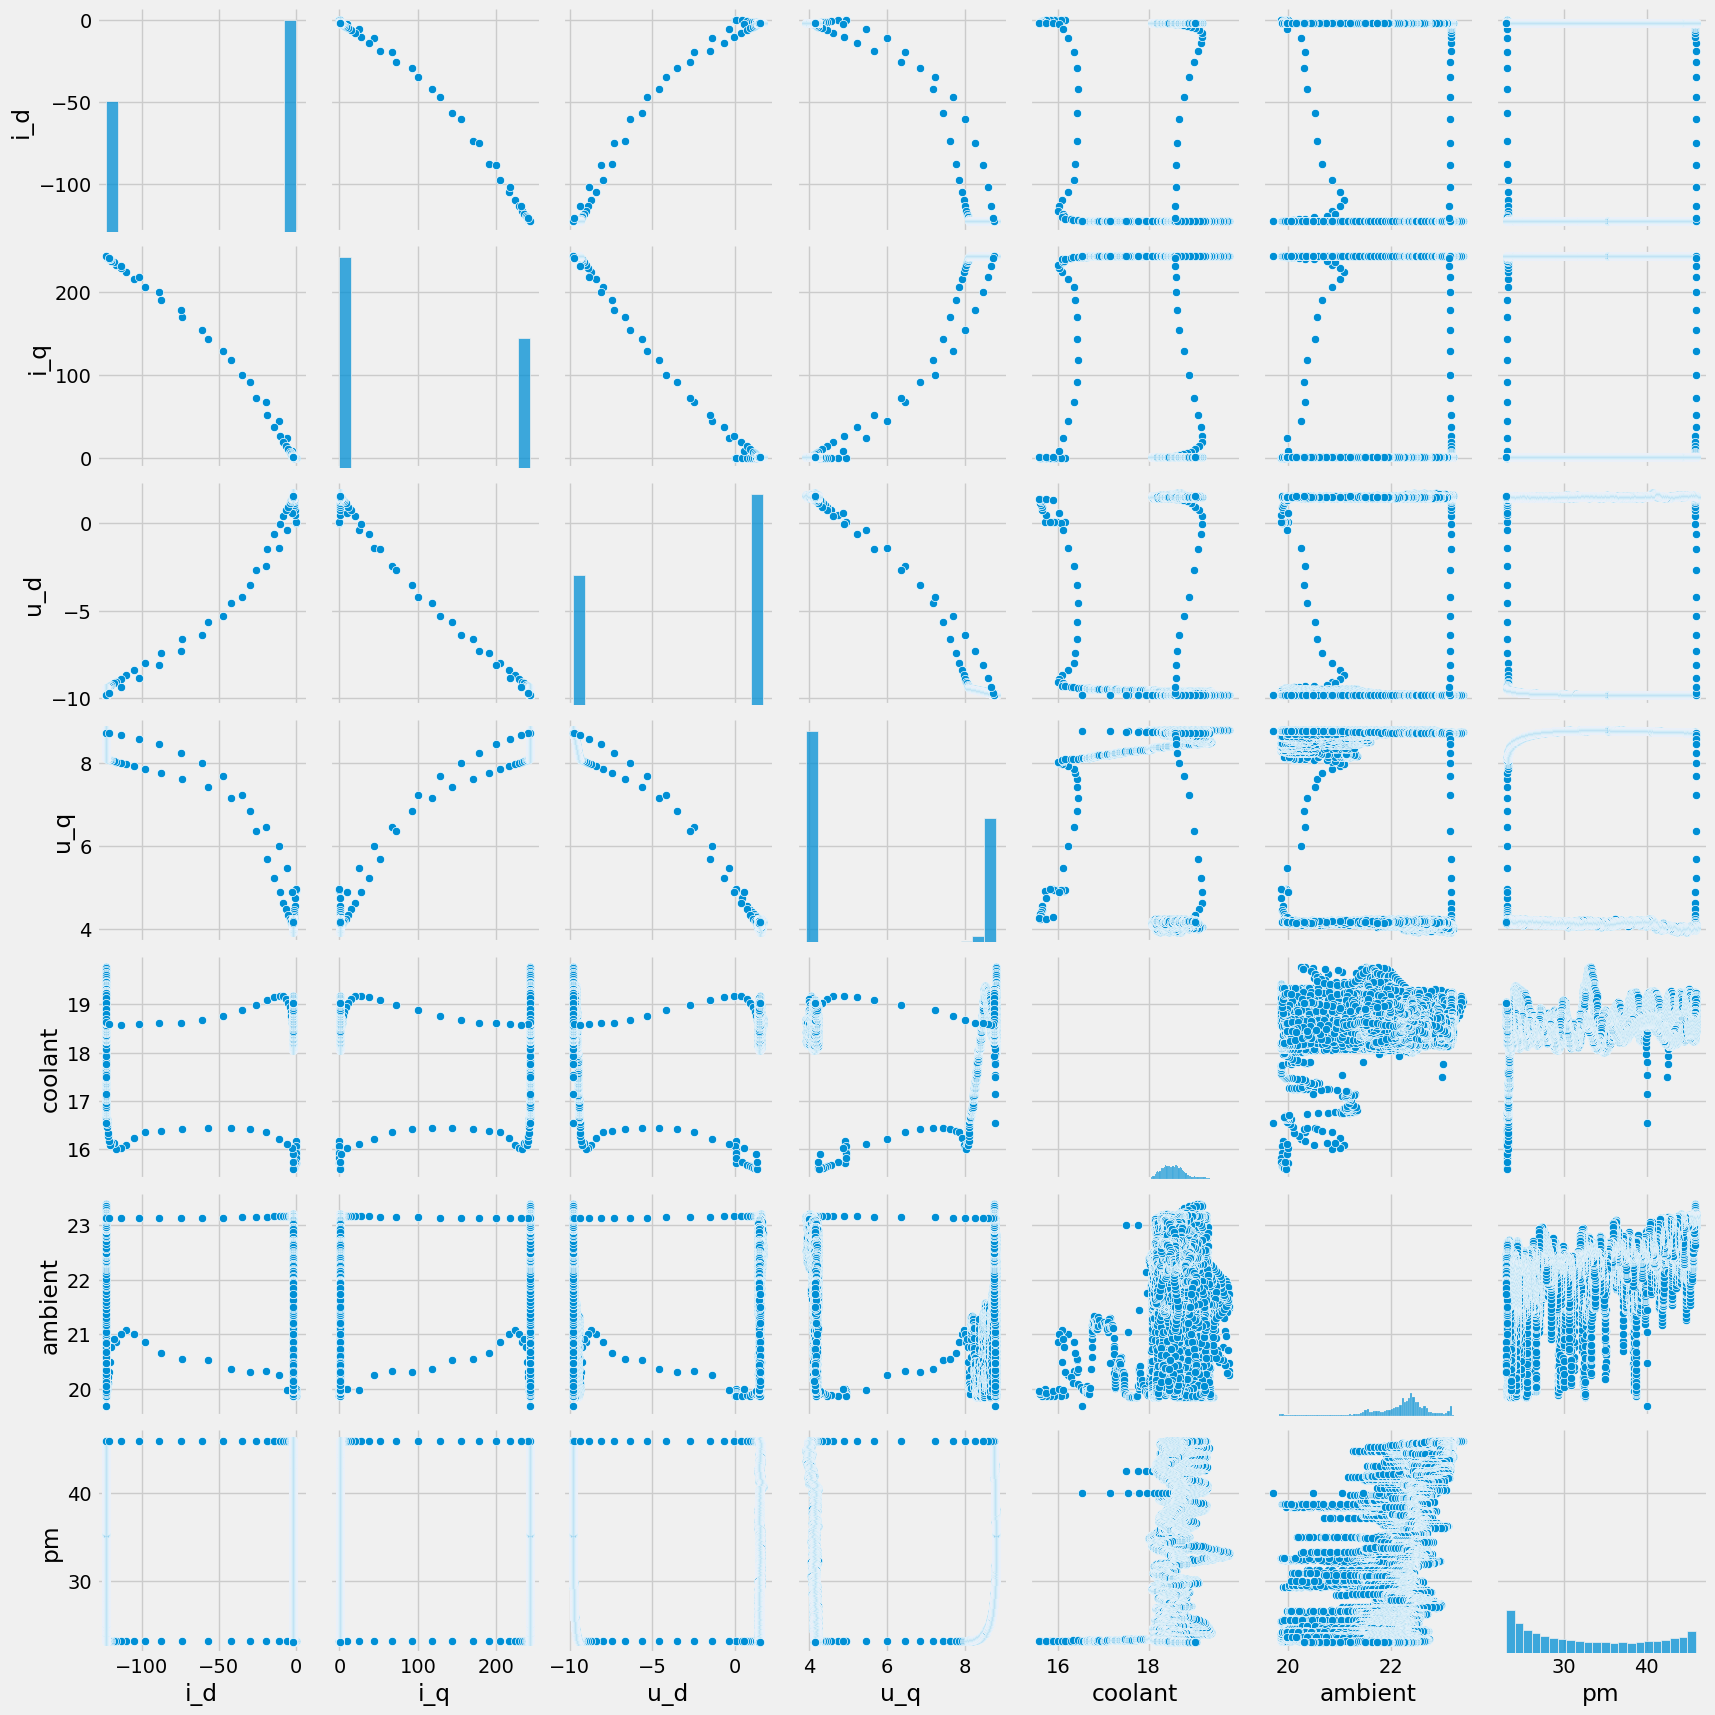

In [11]:
selected = df[df['profile_id'] == 2].loc[:, ['i_d', 'i_q', 'u_d', 'u_q', 'coolant', 'ambient', 'pm']]
sns.pairplot(selected) 
# displaying the plot 
plt.show()

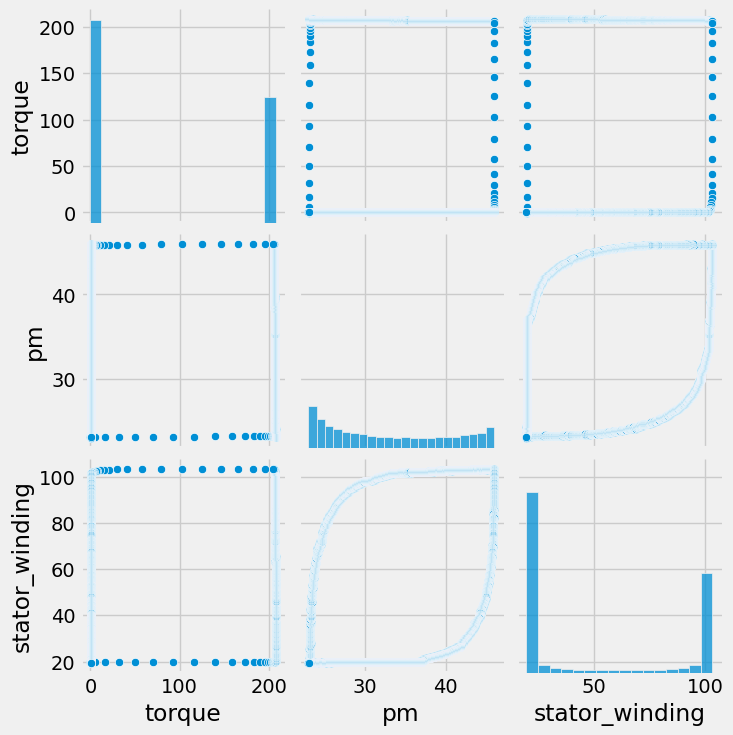

In [12]:
selected = df[df['profile_id'] == 2].loc[:, ['torque', 'pm', 'stator_winding']]
sns.pairplot(selected) 
# displaying the plot 
plt.show()